# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Your code here
# # Descomprimir carpeta zip
# with zipfile.ZipFile('data_all.zip', 'r') as zip_ref:
#     zip_ref.extractall()

data = pd.read_csv('data_all.csv')
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [4]:
# Dimensión del df
data.shape

(116322, 785)

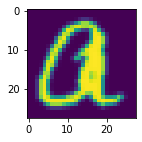

In [5]:
# Gráficamos el 1 renglón
plt.figure(figsize=(2,2))
plt.imshow(np.array(data.iloc[0][1:]).reshape(28,28))  
plt.show()


In [6]:
# Valores únicos de la columna e
print('Total de valores únicos:', len(data.e.unique()))
print(sorted(data.e.unique()))

Total de valores únicos: 62
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0]


Valor de e: 0.0


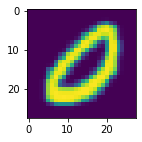

Valor de e: 1.0


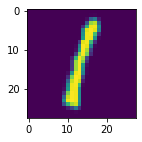

Valor de e: 2.0


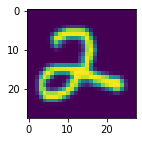

Valor de e: 3.0


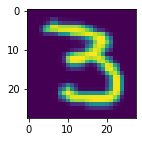

Valor de e: 4.0


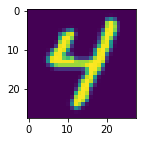

Valor de e: 5.0


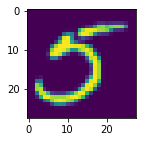

Valor de e: 6.0


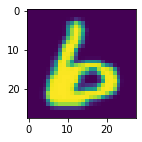

Valor de e: 7.0


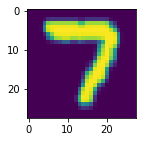

Valor de e: 8.0


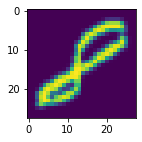

Valor de e: 9.0


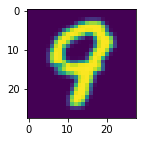

Valor de e: 10.0


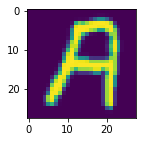

Valor de e: 11.0


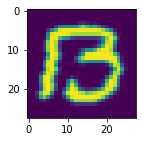

Valor de e: 12.0


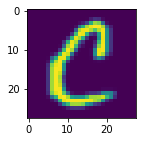

Valor de e: 13.0


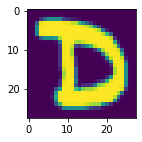

Valor de e: 14.0


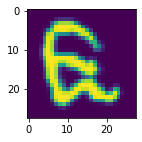

Valor de e: 15.0


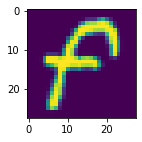

Valor de e: 16.0


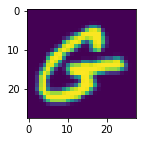

Valor de e: 17.0


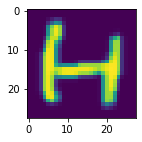

Valor de e: 18.0


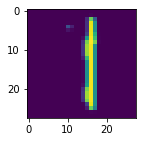

Valor de e: 19.0


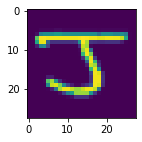

Valor de e: 20.0


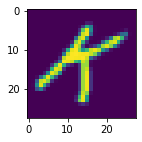

Valor de e: 21.0


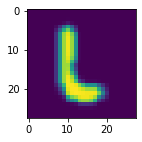

Valor de e: 22.0


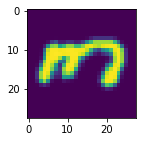

Valor de e: 23.0


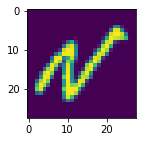

Valor de e: 24.0


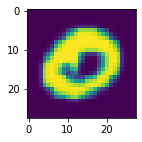

Valor de e: 25.0


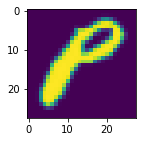

Valor de e: 26.0


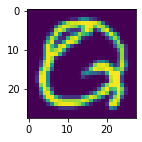

Valor de e: 27.0


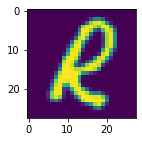

Valor de e: 28.0


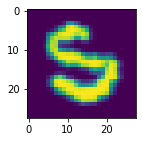

Valor de e: 29.0


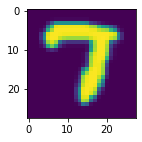

Valor de e: 30.0


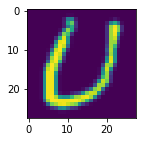

Valor de e: 31.0


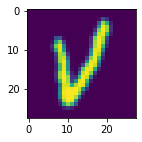

Valor de e: 32.0


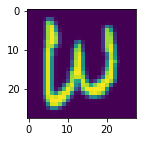

Valor de e: 33.0


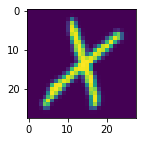

Valor de e: 34.0


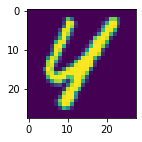

Valor de e: 35.0


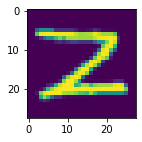

Valor de e: 36.0


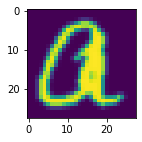

Valor de e: 37.0


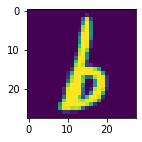

Valor de e: 38.0


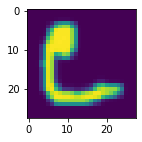

Valor de e: 39.0


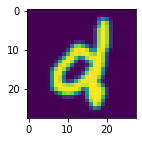

Valor de e: 40.0


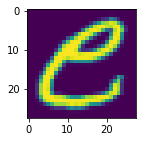

Valor de e: 41.0


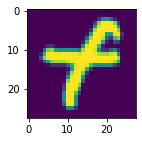

Valor de e: 42.0


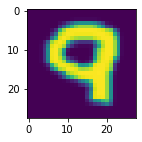

Valor de e: 43.0


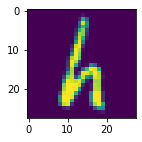

Valor de e: 44.0


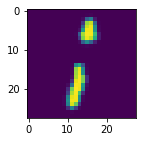

Valor de e: 45.0


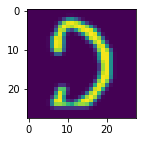

Valor de e: 46.0


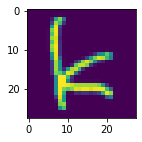

Valor de e: 47.0


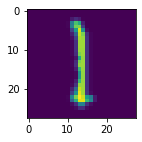

Valor de e: 48.0


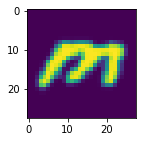

Valor de e: 49.0


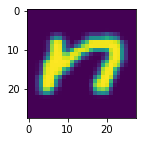

Valor de e: 50.0


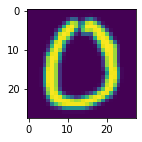

Valor de e: 51.0


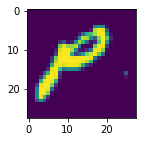

Valor de e: 52.0


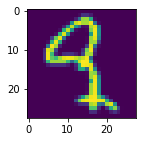

Valor de e: 53.0


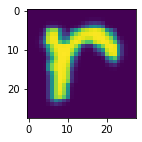

Valor de e: 54.0


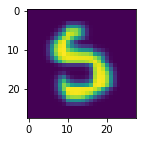

Valor de e: 55.0


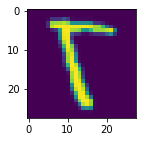

Valor de e: 56.0


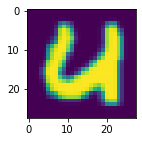

Valor de e: 57.0


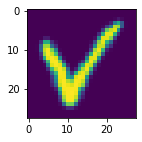

Valor de e: 58.0


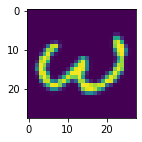

Valor de e: 59.0


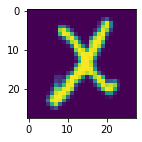

Valor de e: 60.0


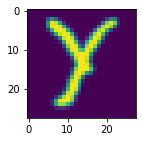

Valor de e: 61.0


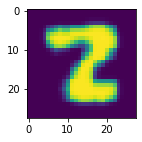

In [7]:
# Df que contiene un único valor de cada categoría de la columna e
df_aux = data.drop_duplicates(['e'])
df_aux = df_aux.sort_values(by=['e'])

# Ciclo for para imprimir los imagenes de cada categoría de la columna e:
for i in range(df_aux.shape[0]):
    print('Valor de e:', df_aux.iloc[i][0])
    plt.figure(figsize=(2,2))
    plt.imshow(np.array(df_aux.iloc[i][1:]).reshape(28,28))  
    plt.show()

Del análisis anterior observamos que los registros que tienen como valor en la columna e:

    * 0-9: Corresponden a imágenes de números.
    * 10-35: Corresponden a imágenes de letras mayúsculas.
    * 36-61: Corresponden a imágenes de letras minúsculas.

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [8]:
# Your code here
# Creamos una columna identificar el tipo de imagen
data['type'] = np.where(data.e < 9, 'number', np.where(data.e<36, 'uppercase', 'lowercase'))

number       0.449029
uppercase    0.318349
lowercase    0.232622
Name: type, dtype: float64

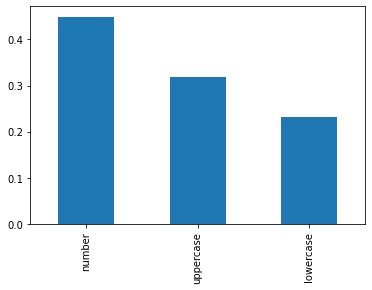

In [9]:
# Distribución del tipo de imagenes en %
display(data['type'].value_counts(normalize = True))
data['type'].value_counts(normalize = True).plot(kind='bar');

In [10]:
# Partimos la data 
upper = data[data.type == 'uppercase']
lower = data[data.type == 'lowercase']
numbers = data[data.type == 'number']

In [11]:
# variables
X = upper.drop(columns=['e', 'type'])

# target
y = upper.e

# Partimos la data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

______________________________________________________
MODELO:  <class 'sklearn.linear_model._logistic.LogisticRegression'> 



C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score : 0.8398811934656406
Confussion Matrix :


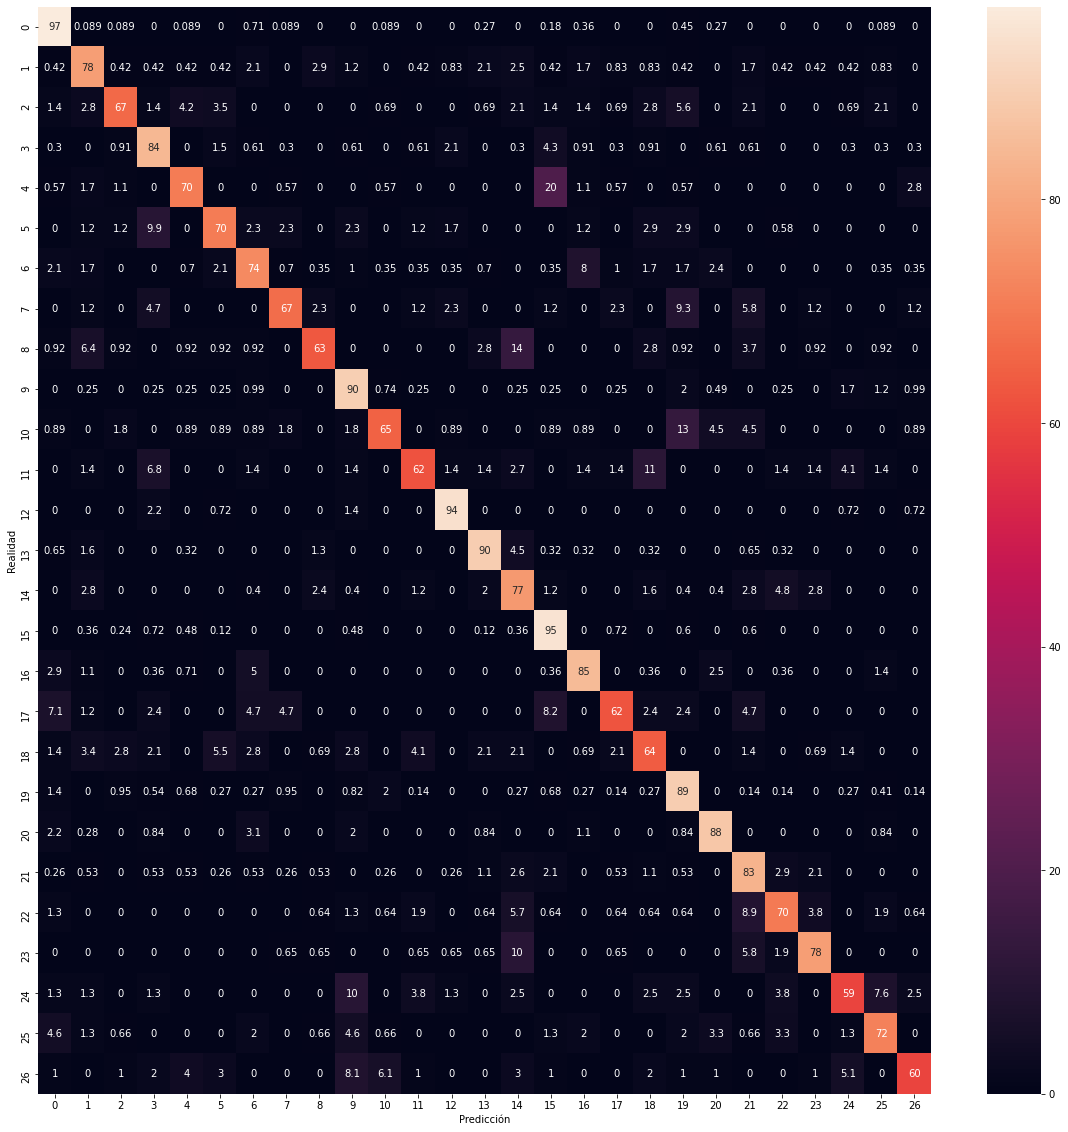


______________________________________________________
MODELO:  <class 'sklearn.svm._classes.SVC'> 

Accuracy Score : 0.8581071958957742
Confussion Matrix :


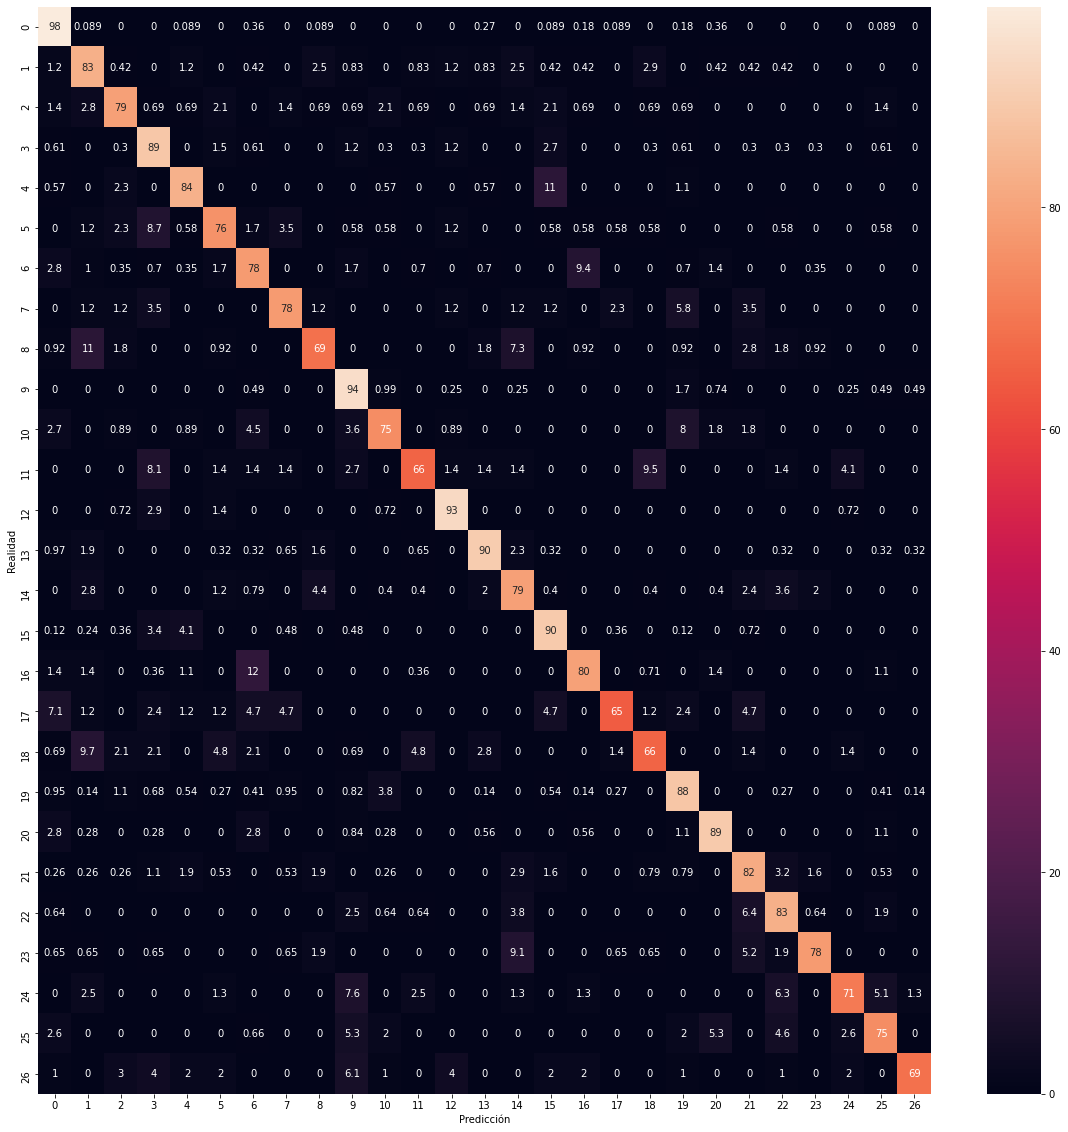


______________________________________________________
MODELO:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 

Accuracy Score : 0.8805184285135682
Confussion Matrix :


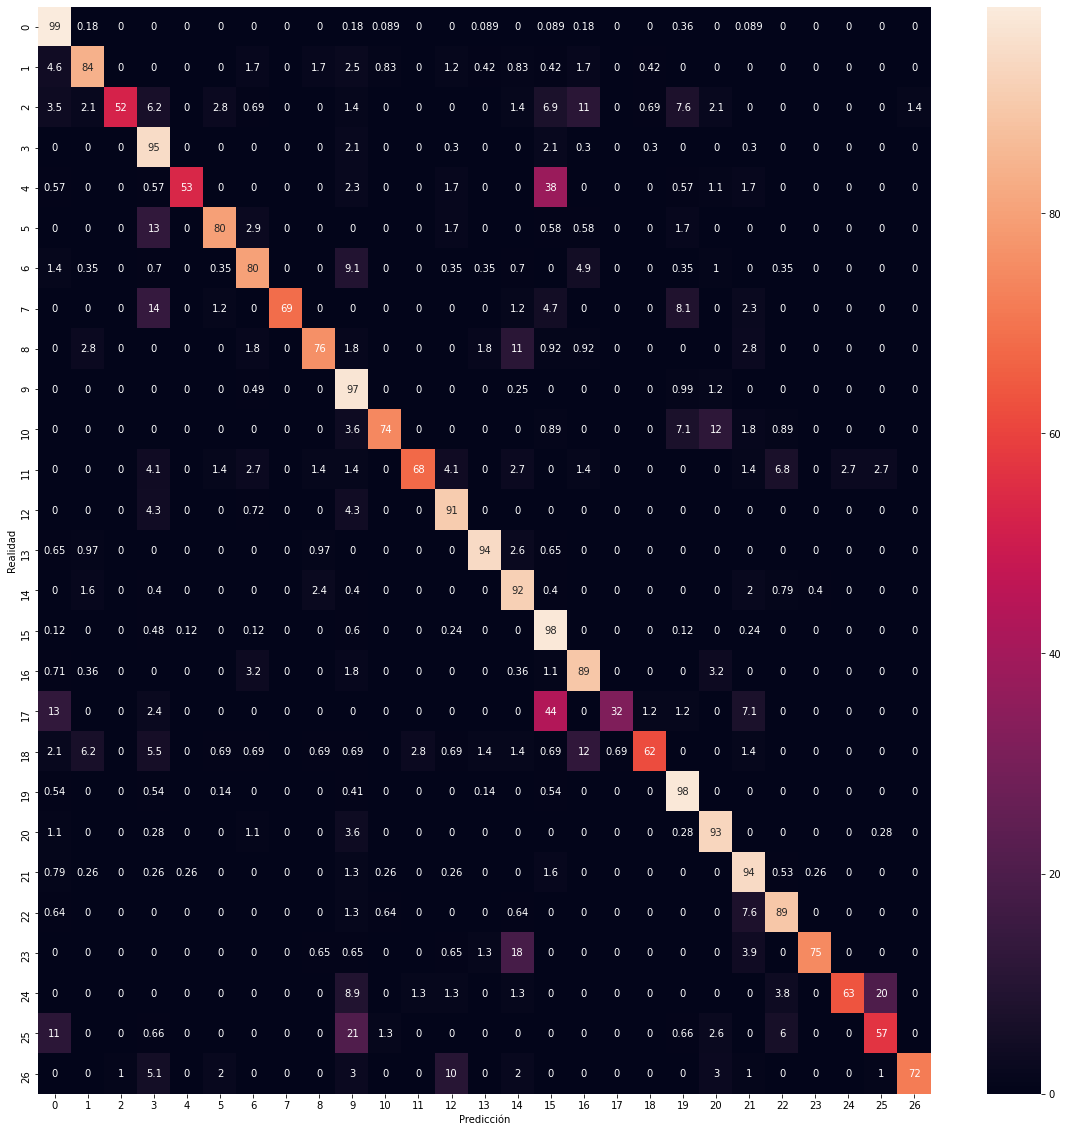


Wall time: 27min 5s


In [12]:
%%time
# Lista de modelos
models = { LogisticRegression : {'random_state':0},
           SVC : {'kernel':'linear', 'random_state':0},
           KNeighborsClassifier : {'n_neighbors':10}}

for m in models.keys():
    
    print('______________________________________________________')
    print('MODELO: ', m, '\n')
    
    # Inicializar el modelo
    model = m(**models[m])

    # Fit model
    model.fit(X_train, y_train)

    # Generar predicción
    y_pred = model.predict(X_test)

    # Imprimir métricas de los modelos
    print('Accuracy Score :', accuracy_score(y_test, y_pred))    
    print('Confussion Matrix :') 
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true')*100, annot=True)
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()
    print('')

In [13]:
# Base en las métricas de accurancy y la matriz de confusión, observamos que los 3 modelos tienen un accurancy 
# mayor 83%, siendo 88% el valor máximo y que corresponde al modelo de KNeighborsClassifier, sin embargo observando 
# la matriz de confusión de este modelo, existen un caso donde sólo acierta un 32% de las veces. Mientras que en la
# matriz de confusión de SVC, los verdaderos positivos están por arriba del 65%. Razón por la cuál optaría por este modelo.

* Try to do the same thing with lowercases.

In [14]:
# Your code here
# variables
X = lower.drop(columns=['e', 'type'])

# target
y = lower.e

# Partimos la data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

______________________________________________________
MODELO:  <class 'sklearn.linear_model._logistic.LogisticRegression'> 



C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score : 0.7921286031042128
Confussion Matrix :


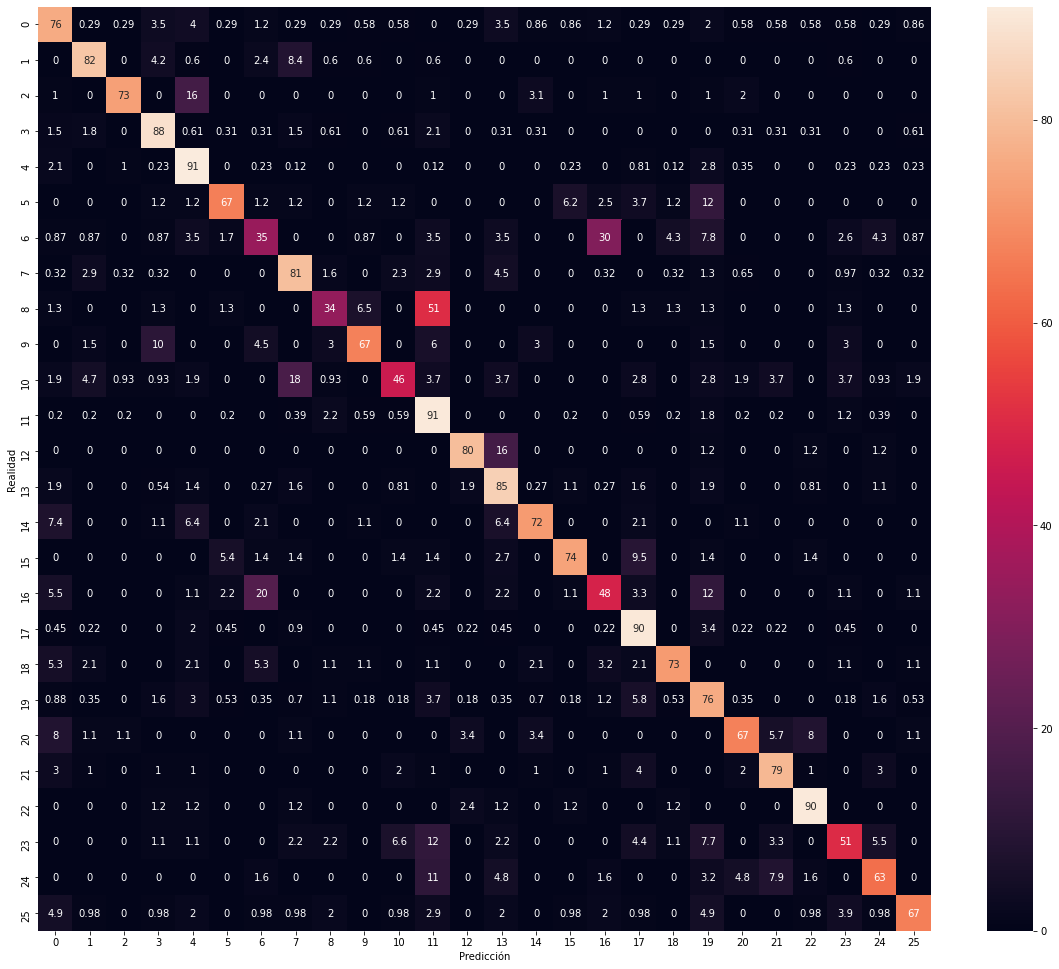


______________________________________________________
MODELO:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 

Accuracy Score : 0.8527346637102735
Confussion Matrix :


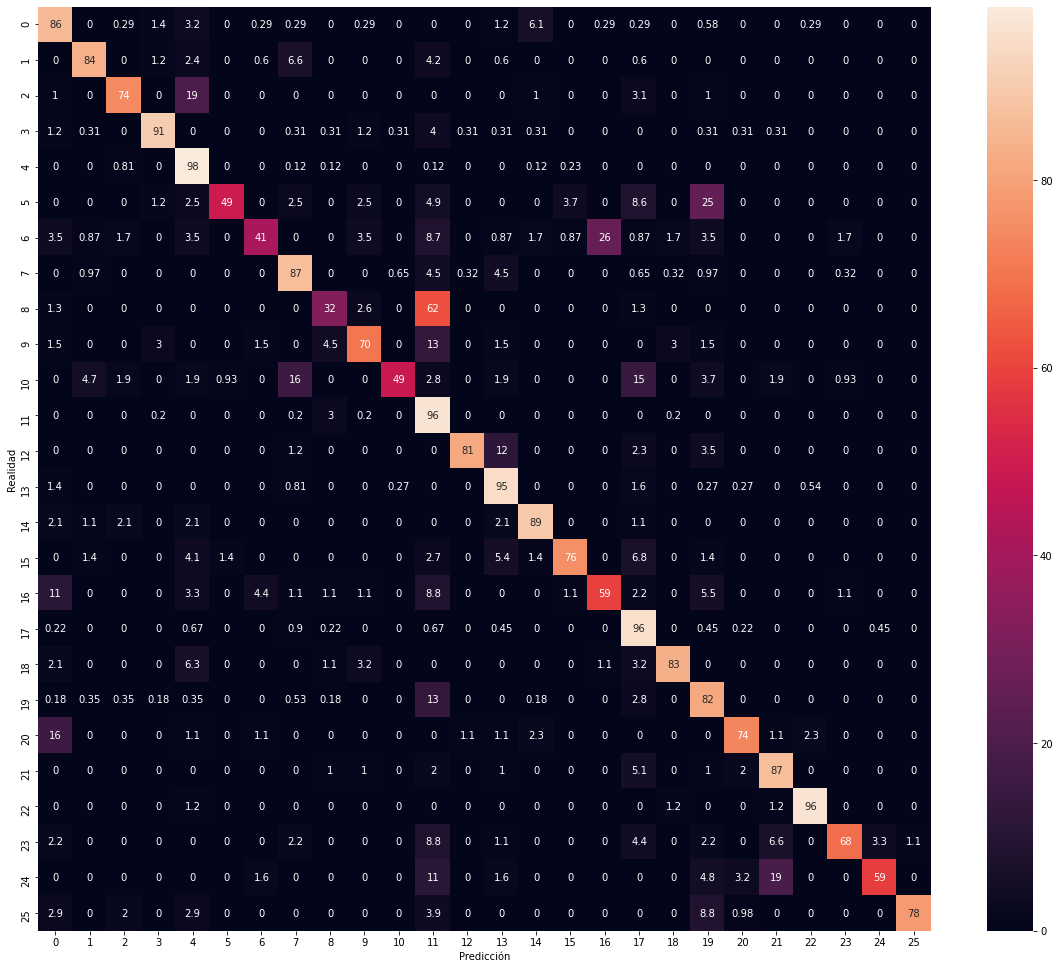


______________________________________________________
MODELO:  <class 'sklearn.ensemble._forest.RandomForestClassifier'> 

Accuracy Score : 0.876940133037694
Confussion Matrix :


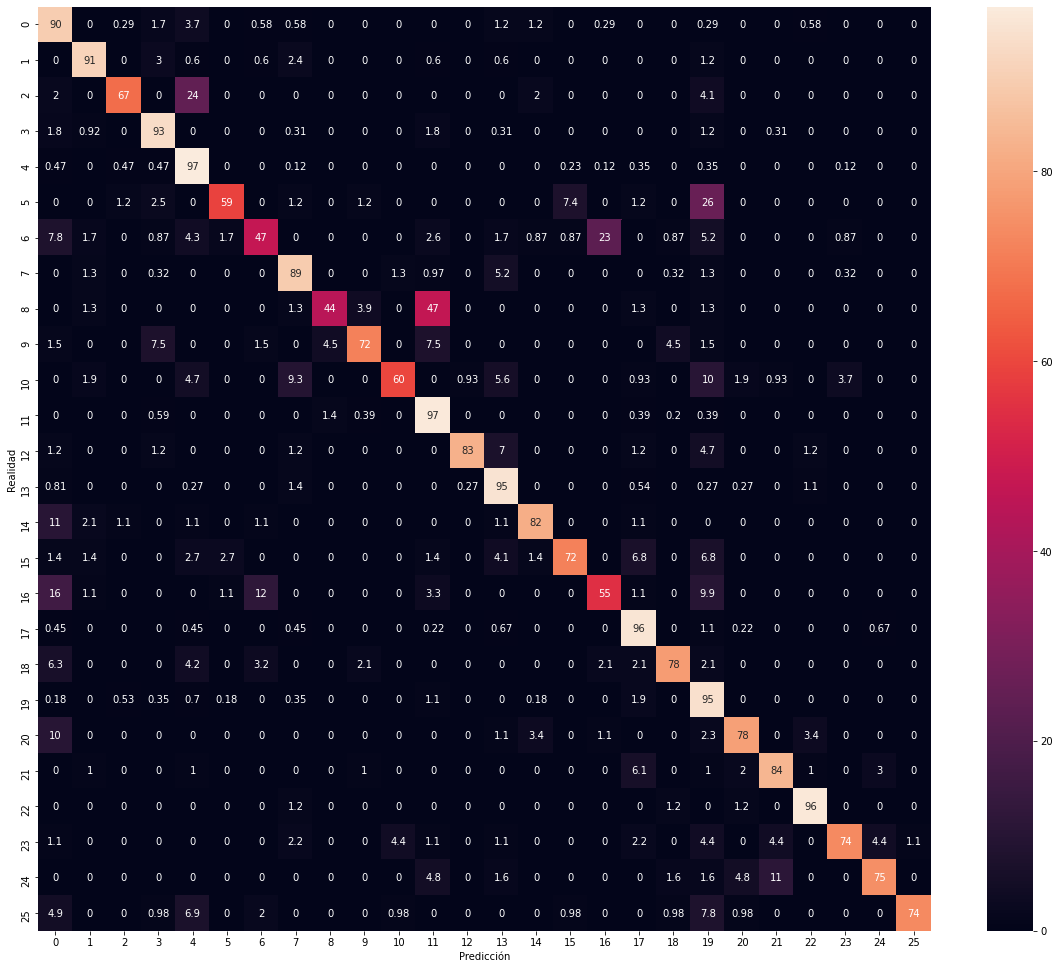


Wall time: 7min 55s


In [15]:
%%time
# Lista de modelos
models = { LogisticRegression : {'random_state':0},
#            SVC : {'kernel':'linear', 'random_state':0},
           KNeighborsClassifier : {'n_neighbors':10}, 
           RandomForestClassifier : {'random_state':0}}

for m in models.keys():
    
    print('______________________________________________________')
    print('MODELO: ', m, '\n')
    
    # Inicializar el modelo
    model = m(**models[m])

    # Fit model
    model.fit(X_train, y_train)

    # Generar predicción
    y_pred = model.predict(X_test)

    # Imprimir métricas de los modelos
    print('Accuracy Score :', accuracy_score(y_test, y_pred))    
    print('Confussion Matrix :') 
    fig, ax = plt.subplots(figsize=(20,17))
    sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true')*100, annot=True)
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()
    print('')

* Try to do the same thing with numbers.

______________________________________________________
MODELO:  <class 'sklearn.linear_model._logistic.LogisticRegression'> 



C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score : 0.9396956063941801
Confussion Matrix :


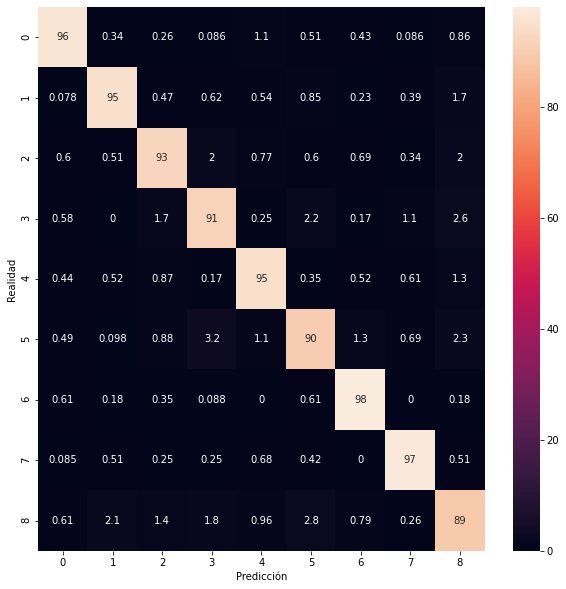


______________________________________________________
MODELO:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 

Accuracy Score : 0.9697520819373983
Confussion Matrix :


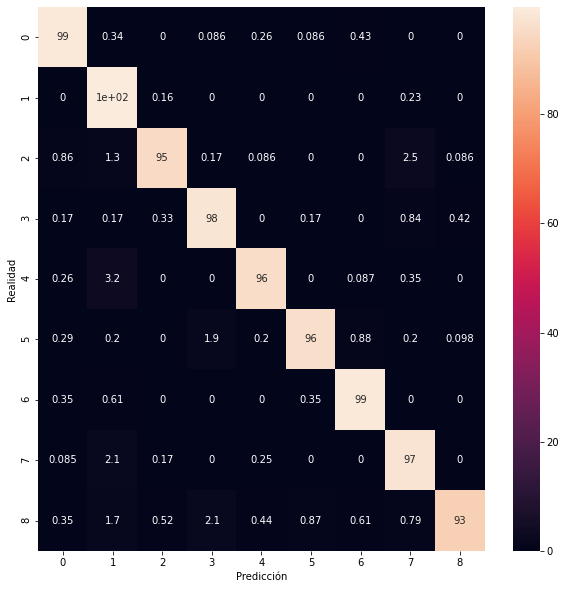


______________________________________________________
MODELO:  <class 'sklearn.ensemble._forest.RandomForestClassifier'> 

Accuracy Score : 0.9760696850770556
Confussion Matrix :


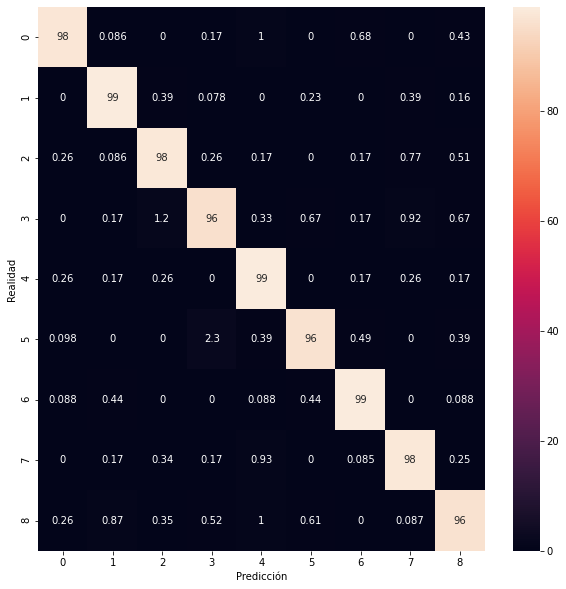


Wall time: 26min 45s


In [16]:
%%time
# variables
X = numbers.drop(columns=['e', 'type'])

# target
y = numbers.e

# Partimos la data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Lista de modelos
models = { LogisticRegression : {'random_state':0},
#            SVC : {'kernel':'linear', 'random_state':0},
           KNeighborsClassifier : {'n_neighbors':10}, 
           RandomForestClassifier : {'random_state':0}}

for m in models.keys():
    
    print('______________________________________________________')
    print('MODELO: ', m, '\n')
    
    # Inicializar el modelo
    model = m(**models[m])

    # Fit model
    model.fit(X_train, y_train)

    # Generar predicción
    y_pred = model.predict(X_test)

    # Imprimir métricas de los modelos
    print('Accuracy Score :', accuracy_score(y_test, y_pred))    
    print('Confussion Matrix :') 
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true')*100, annot=True)
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()
    print('')